### Importing all the libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, metrics
from keras import callbacks
import seaborn as sns
%matplotlib inline

### Importing the dataset

In [2]:
df=pd.read_csv("./Telco-Customer-Churn.csv")

In [3]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
716,9944-AEXBM,Male,0,No,No,32,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),85.65,2664.30,No
1879,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65,No
4384,3373-YZZYM,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.20,19.20,No
3905,3882-IYOIJ,Female,0,Yes,Yes,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.25,6758.45,No
4198,6427-FEFIG,Female,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),78.60,1846.65,No
6962,9972-VAFJJ,Female,1,Yes,No,53,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,94.00,4871.45,No
5448,9496-IVVRP,Female,0,Yes,Yes,11,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),51.00,581.70,No
6839,0531-XBKMM,Male,0,No,Yes,66,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.70,4378.90,No
5919,1830-IPXVJ,Female,0,Yes,Yes,61,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.75,1311.60,No
1289,3022-BEXHZ,Male,0,Yes,Yes,67,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.20,7530.80,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.shape

(7032, 21)

### Removing the customerID column because it is not putting any value to the dataset which will help in customer churn prediction

In [6]:
df.drop(columns=['customerID'], axis=0, inplace=True)

In [7]:
df.shape

(7032, 20)

In [8]:
df[df['Churn']=='Yes']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7015,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7021,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7023,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [9]:
df[df['Churn']=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [11]:
values=df['Churn'].value_counts()
values

No     5163
Yes    1869
Name: Churn, dtype: int64

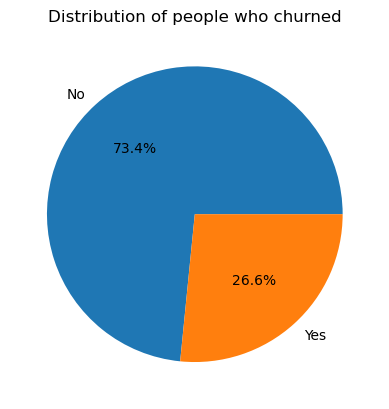

In [13]:
labels=['No', 'Yes']
plt.pie(values, labels=labels, autopct='%0.1f%%')
plt.title("Distribution of people who churned")
plt.show()

### Exploratory Data Analysis

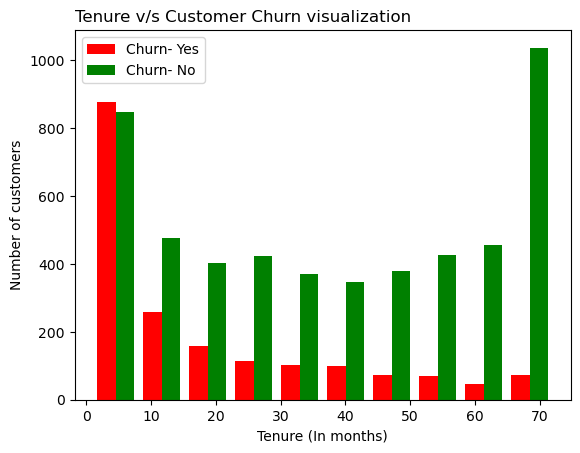

In [15]:
tenure_churn_yes=df[df['Churn']=='Yes'].tenure
tenure_churn_no=df[df['Churn']=='No'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], label=['Churn- Yes', 'Churn- No'])
plt.title("Tenure v/s Customer Churn visualization", loc='left')
plt.xlabel("Tenure (In months)")
plt.ylabel("Number of customers")
plt.legend()
plt.show()

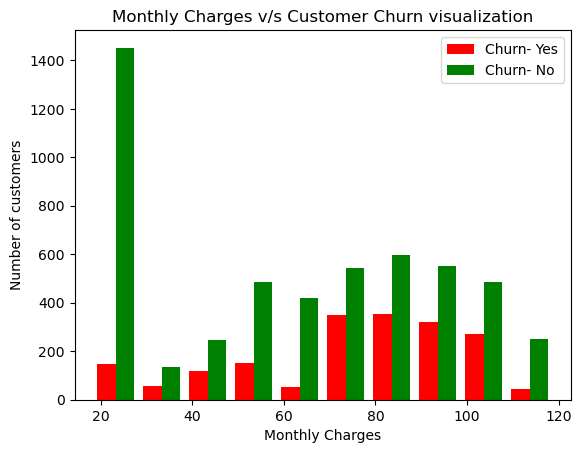

In [16]:
monthly_charges_churn_yes=df[df['Churn']=='Yes'].MonthlyCharges
monthly_charges_churn_no=df[df['Churn']=='No'].MonthlyCharges

plt.hist([monthly_charges_churn_yes, monthly_charges_churn_no], color=['red', 'green'], label=['Churn- Yes', 'Churn- No'])
plt.title("Monthly Charges v/s Customer Churn visualization")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.legend()
plt.show()

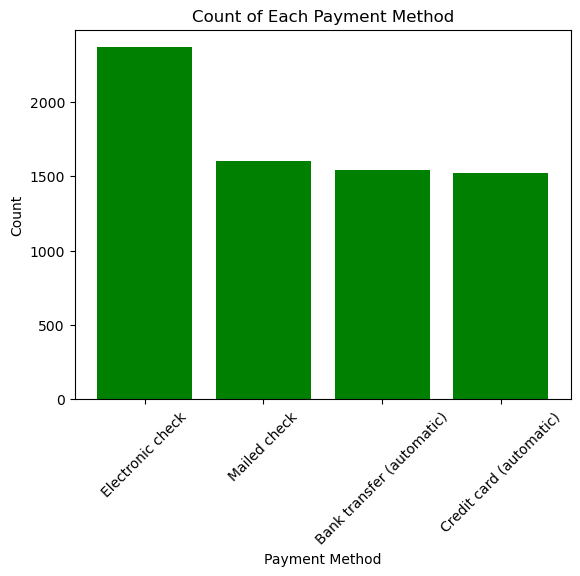

In [17]:
payment_counts = df['PaymentMethod'].value_counts()
plt.bar(payment_counts.index, payment_counts.values, color='green')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Count of Each Payment Method')
plt.xticks(rotation=45)
plt.show()

### Checking all the unique values in all the columns

In [18]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [19]:
df['MultipleLines'].replace("No phone service", "No", inplace=True)

In [20]:
df['DeviceProtection'].replace("No internet service", "No", inplace=True)
df['OnlineSecurity'].replace("No internet service", "No", inplace=True)
df['OnlineBackup'].replace("No internet service", "No", inplace=True)
df['TechSupport'].replace("No internet service", "No", inplace=True)
df['StreamingTV'].replace("No internet service", "No", inplace=True)
df['StreamingMovies'].replace("No internet service", "No", inplace=True)

In [21]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


### Replace all the columns with yes and no with '1' and '0'

In [22]:
yes_and_no_columns=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_and_no_columns:
    df[col].replace({"Yes": 1, "No": 0}, inplace=True)

In [23]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [24]:
df['gender'].replace({"Female": 1, "Male": 0}, inplace=True)

In [25]:
df['gender'].unique()

array([1, 0])

### One-hot encoding for all the other columns

In [26]:
df=pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [27]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df.shape

(7032, 27)

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [30]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### Using MinMax Scaler on columns in the dataframe for scaling the values

In [31]:
cols_to_scale=['tenure', 'MonthlyCharges', 'TotalCharges']
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [32]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5552,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
3030,1,1,1,0,0.338028,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3736,1,0,0,0,0.563380,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
1236,0,0,0,0,0.338028,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1030,1,0,1,0,0.859155,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [33]:
len(df[df['Dependents']==0])

4933

In [34]:
len(df[df['SeniorCitizen']==1])

1142

In [35]:
df['MonthlyCharges'].sample(5)

1831    0.773632
4879    0.021891
3172    0.304975
1140    0.172139
2985    0.155721
Name: MonthlyCharges, dtype: float64

In [36]:
df['TotalCharges'].sample(5)

4445    0.117580
1851    0.257541
2665    0.574804
4414    0.346469
4013    0.522409
Name: TotalCharges, dtype: float64

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [38]:
df.to_csv('preprocessed_data.csv', index=False)

In [39]:
X=df.drop(columns=['Churn'], axis=0)

In [40]:
X.shape

(7032, 26)

In [41]:
y=df['Churn']

In [42]:
y.shape

(7032,)

### Train and test split

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=5)

In [44]:
print("X train shape", X_train.shape)
print("X test shape", X_test.shape)
print("y train shape", y_train.shape)
print("y test shape", y_test.shape)

X train shape (5625, 26)
X test shape (1407, 26)
y train shape (5625,)
y test shape (1407,)


### Logistic Regression

In [45]:
log_reg=LogisticRegression()

In [46]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [47]:
log_reg_pred=log_reg.predict(X_test)

In [48]:
confusion_matrix=metrics.confusion_matrix(y_test, log_reg_pred)

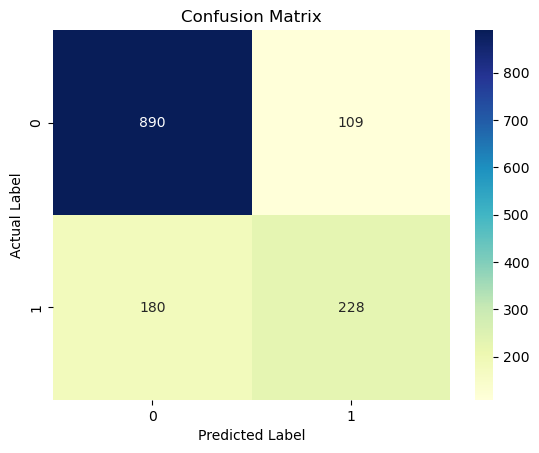

In [49]:
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [50]:
target_names=['No Churn- Positive', 'Churn- Negative']
print(classification_report(y_test, log_reg_pred, target_names=target_names))

                    precision    recall  f1-score   support

No Churn- Positive       0.83      0.89      0.86       999
   Churn- Negative       0.68      0.56      0.61       408

          accuracy                           0.79      1407
         macro avg       0.75      0.72      0.74      1407
      weighted avg       0.79      0.79      0.79      1407



### Decision Tree Classifier

In [53]:
dt_clf=DecisionTreeClassifier()

In [54]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
dt_clf_pred=dt_clf.predict(X_test)

In [56]:
confusion_matrix=metrics.confusion_matrix(y_test, dt_clf_pred)

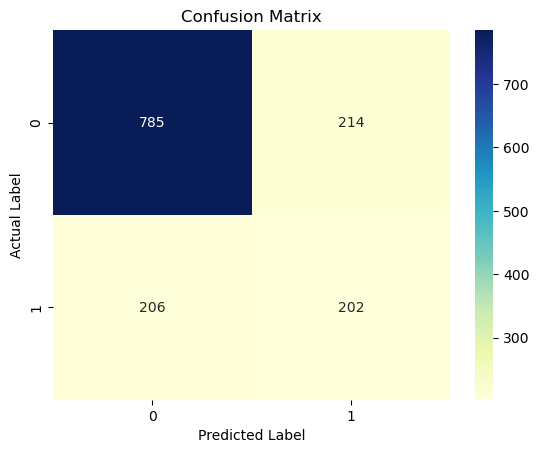

In [57]:
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [58]:
target_names=['No Churn- Positive', 'Churn- Negative']
print(classification_report(y_test, dt_clf_pred, target_names=target_names))

                    precision    recall  f1-score   support

No Churn- Positive       0.79      0.79      0.79       999
   Churn- Negative       0.49      0.50      0.49       408

          accuracy                           0.70      1407
         macro avg       0.64      0.64      0.64      1407
      weighted avg       0.70      0.70      0.70      1407



### Trying to optimize the Decison Tree by Hyperparameter tuning using GridSearchCV

In [60]:
dt_params = [{'criterion':['gini', 'entropy'], 'max_depth': [2, 3, 5, 7, 10]}]
grid_search_dt_clf=GridSearchCV(dt_clf, dt_params, cv=10, scoring='accuracy')
grid_search_dt_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 5, 7, 10]}],
             scoring='accuracy')

### Best parameters obtained with accuracy in training set

In [61]:
print(grid_search_dt_clf.best_params_)
print(grid_search_dt_clf.best_score_)

{'criterion': 'entropy', 'max_depth': 3}
0.791997623306764


### Accuracy in test set using the best hyperparamters

In [63]:
dt_clf_opt = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt_clf_opt = dt_clf_opt.fit(X_train,y_train)

dt_clf_opt_pred = dt_clf_opt.predict(X_test)

#print("Accuracy:",metrics.accuracy_score(y_test, dt_clf_opt_pred))

In [64]:
confusion_matrix=metrics.confusion_matrix(y_test, dt_clf_opt_pred)

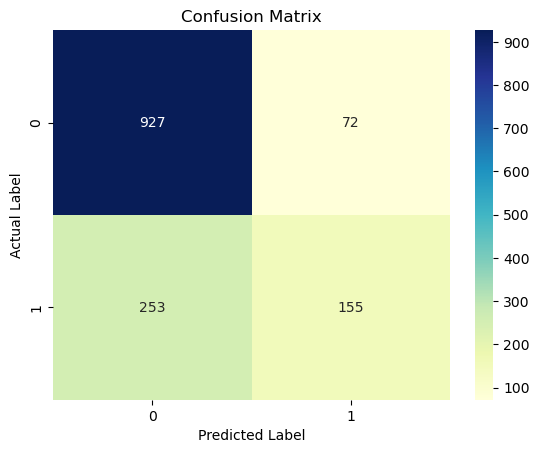

In [65]:
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [67]:
target_names=['No Churn- Positive', 'Churn- Negative']
print(classification_report(y_test, dt_clf_opt_pred, target_names=target_names))

                    precision    recall  f1-score   support

No Churn- Positive       0.79      0.93      0.85       999
   Churn- Negative       0.68      0.38      0.49       408

          accuracy                           0.77      1407
         macro avg       0.73      0.65      0.67      1407
      weighted avg       0.76      0.77      0.75      1407



### Clearly, performance of Logistic Regression outperformed the Decision Tree algorithm even after doing the Hyperparameter tuning. Now let's use ANN and find out the performance

In [114]:
model=keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=[metrics.Precision(name='precision'), metrics.Recall(name='recall')])

early_stopping = callbacks.EarlyStopping(monitor='precision', mode='max', patience=5, restore_best_weights=True)

history=model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping])

Epoch 1/100
176/176 [==============================] - 0s 314us/step - loss: 0.5270 - precision: 0.4583 - recall: 0.1581
Epoch 2/100
176/176 [==============================] - 0s 260us/step - loss: 0.4255 - precision: 0.6498 - recall: 0.4750
Epoch 3/100
176/176 [==============================] - 0s 261us/step - loss: 0.4175 - precision: 0.6556 - recall: 0.5133
Epoch 4/100
176/176 [==============================] - 0s 265us/step - loss: 0.4154 - precision: 0.6511 - recall: 0.5147
Epoch 5/100
176/176 [==============================] - 0s 294us/step - loss: 0.4134 - precision: 0.6598 - recall: 0.5229
Epoch 6/100
176/176 [==============================] - 0s 341us/step - loss: 0.4129 - precision: 0.6597 - recall: 0.5161
Epoch 7/100
176/176 [==============================] - 0s 282us/step - loss: 0.4117 - precision: 0.6580 - recall: 0.5216
Epoch 8/100
176/176 [==============================] - 0s 273us/step - loss: 0.4115 - precision: 0.6620 - recall: 0.5229
Epoch 9/100
176/176 [===========

In [115]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 308us/step - loss: 0.4375 - precision: 0.6810 - recall: 0.5441


[0.4375009536743164, 0.6809815764427185, 0.5441176295280457]

In [89]:
model_predict=model.predict(X_test)
model_predict[:5]

44/44 [==============================] - 0s 243us/step


array([[0.19538474],
       [0.4012712 ],
       [0.01162547],
       [0.787649  ],
       [0.6581337 ]], dtype=float32)

In [90]:
y_test[:5]

2655    0
743     0
5570    1
64      1
3282    1
Name: Churn, dtype: int64

In [91]:
y_pred=[]
for i in model_predict:
    if(i<0.5):
        y_pred.append(0)
    else:
        y_pred.append(1)


In [92]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [74]:
confusion_matrix=metrics.confusion_matrix(y_test, y_pred)

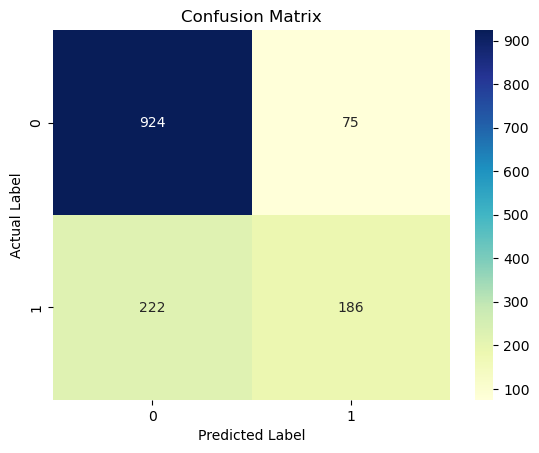

In [75]:
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       999
           1       0.71      0.46      0.56       408

    accuracy                           0.79      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.78      0.79      0.77      1407



### Testing/Validating on first 5 values of existing dataframe with ANN

In [77]:
df_test=df.head(5)

In [78]:
df_test.drop(columns=['Churn'], inplace=True)

/var/folders/yd/_4rnltyx4nv04y4l8nf8nckr0000gn/T/ipykernel_29364/1487049798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Churn'], inplace=True)


In [79]:
df_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [80]:
model_predict_test=model.predict(df_test)

1/1 [==============================] - 0s 11ms/step


In [81]:
model_predictions=[]
for i in model_predict_test:
    if(i<0.5):
        model_predictions.append(0)
    else:
        model_predictions.append(1)

In [82]:
model_predictions

[0, 0, 0, 0, 1]

In [83]:
print(df['Churn'].head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64


In [84]:
confusion_matrix_test=metrics.confusion_matrix(df['Churn'].head(), model_predictions)

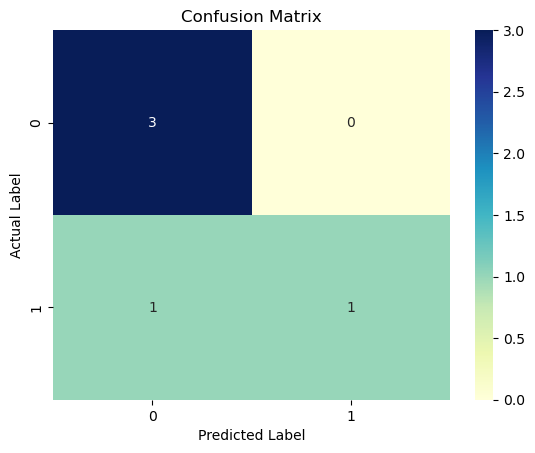

In [85]:
sns.heatmap(confusion_matrix_test, annot=True, cmap="YlGnBu", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()